## Taking a look at our dataset

In [1]:
from lib.dataset import initialize_dataset, enhance_dataset
from lib.dataset import Dataset

In [2]:
initialize_dataset()

Applying the masks on the images...
Gathering the labels...
Saving the preprocessed dataset...


In [3]:
enhance_dataset()

Applying the masks on the images...
Gathering the labels...
Saving the preprocessed dataset...


Example image with label COVID:


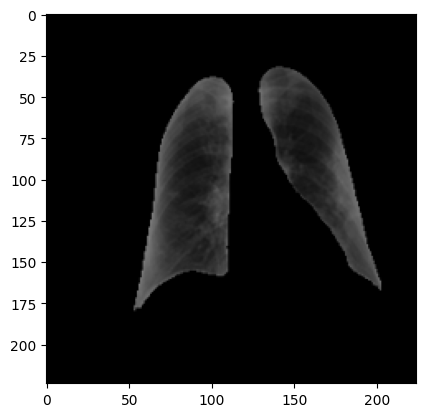

In [6]:
import matplotlib.pyplot as plt
# the dataset
ds1 = Dataset(path="dataset")
ds1.load_local()
ds1.show_image(503)

Example image with label COVID:


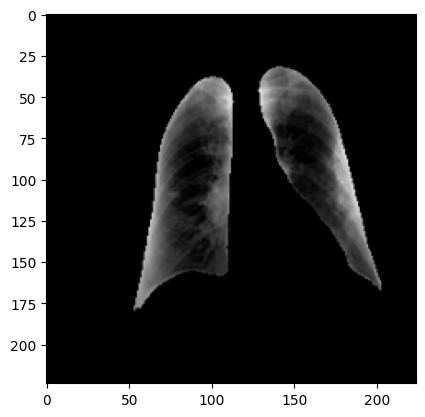

In [7]:
# the dataset
ds2 = Dataset(path="enhanced")
ds2.load_local()
ds2.show_image(503)

## Training with different query strategies

In [4]:
# the query strategies to try

from lib.queries import random, uncertainty, margin, entropy
qss = [("random", random), ("uncertainty", uncertainty), ("margin", margin), ("entropy", entropy)]

In [5]:
# create the files for the results for each query strategy

import os
def checkmake(path:str):
    if not os.path.exists(path):
        os.mkdir(path)

checkmake("results")
for datafolder in ["dataset", "enhanced"]:
    checkmake(f"results/{datafolder}")
    for qs_name, _ in qss:
        checkmake(f"results/{datafolder}/{qs_name}")
        if not os.path.exists(f"results/{datafolder}/{qs_name}/checkpoints.txt"):
            with open(f"results/{datafolder}/{qs_name}/checkpoints.txt", "w") as f:
                f.write("")

In [6]:
query_size = 32
max_train_imgs = 512
epochs = 8
batch_size = 16

In [7]:
# the steps we will take (steps over the size of the data)
steps = [i for i in range(query_size, max_train_imgs+1, query_size)]

In [8]:
# we now train models for every query strategy, and save accuracy data along the way

import time 
from lib.activelearner import ActiveLearner
# variables for colored output
OKCYAN = '\033[96m'
ENDC = '\033[0m'

for dataset in [ds1, ds2]:
    for i, (name, qs) in enumerate(qss):
        time_start = time.time()

        accs = []

        active_learner = ActiveLearner(dataset, architecture="vgg16").with_params(epochs, batch_size)

        for j, max_imgs in enumerate(steps):
            time_round_start = time.time()
            print(f"{OKCYAN}<{name} ({i+1}/{len(qss)}) | using {max_imgs} images ({j+1}/{len(steps)})>{ENDC}")

            # select less samples if we can't select the full query_size anymore
            n = min([query_size, (max_imgs - sum(active_learner.used))])

            # select samples
            active_learner.select_samples(qs, n)

            # train the model
            active_learner.train()

            # test the model
            active_learner.test()

            # save metrics to file
            with open(f"results/{dataset.path}/{name}/checkpoints.txt", "a") as f:
                f.write(f"{str(active_learner)}\n")

            time_round = int(time.time() - time_round_start) // 60
            time_total = int(time.time() - time_start) // 60

            print(f"{OKCYAN}----> finished round in {time_round} mins  (total run time for {name}: {time_total} mins){ENDC}")


Metal device set to: Apple M1 Pro


2022-12-03 21:00:47.232320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-03 21:00:47.232450: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<random (1/4) | using 32 images (1/16)>
model: selecting 32 imgs...
model: training...


2022-12-03 21:00:47.948238: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-03 21:00:48.500096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...


2022-12-03 21:00:58.393508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 64 images (2/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 96 images (3/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 128 images (4/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 160 images (5/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 192 images (6/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 224 images (7/16)>
model: selecting 32 img

2022-12-03 21:04:57.715320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 31s 289ms/step
model: training...


2022-12-03 21:05:29.632072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 0 mins)
<uncertainty (2/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 34s 324ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 1 mins)
<uncertainty (2/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 34s 321ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 2 mins)
<uncertainty (2/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 34s 325ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 3 mins)
<uncertainty (2/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 34s 326ms/step
model: training...
model: testing...
----> finished r

2022-12-03 21:19:21.796975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 39s 358ms/step
model: training...


2022-12-03 21:20:02.368175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for margin: 0 mins)
<margin (3/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 37s 346ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 1 mins)
<margin (3/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 36s 347ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 2 mins)
<margin (3/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 36s 351ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 3 mins)
<margin (3/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 37s 358ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for marg

2022-12-03 21:33:50.685993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 41s 385ms/step
model: training...


2022-12-03 21:34:32.791533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 1 mins  (total run time for entropy: 1 mins)
<entropy (4/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 41s 384ms/step
model: training...
model: testing...
----> finished round in 1 mins  (total run time for entropy: 2 mins)
<entropy (4/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 41s 390ms/step
model: training...
model: testing...
----> finished round in 1 mins  (total run time for entropy: 3 mins)
<entropy (4/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 34s 324ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 3 mins)
<entropy (4/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 33s 315ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time 

2022-12-03 21:46:48.584743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...


2022-12-03 21:46:58.666534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 64 images (2/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 96 images (3/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 0 mins)
<random (1/4) | using 128 images (4/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 160 images (5/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 192 images (6/16)>
model: selecting 32 imgs...
model: training...
model: testing...
----> finished round in 0 mins  (total run time for random: 1 mins)
<random (1/4) | using 224 images (7/16)>
model: selecting 32 img

2022-12-03 21:51:00.014072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 34s 316ms/step
model: training...


2022-12-03 21:51:35.343030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 0 mins)
<uncertainty (2/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 32s 298ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 1 mins)
<uncertainty (2/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 31s 293ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 2 mins)
<uncertainty (2/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 31s 295ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for uncertainty: 3 mins)
<uncertainty (2/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 30s 291ms/step
model: training...
model: testing...
----> finished r

2022-12-03 22:03:24.671819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 34s 318ms/step
model: training...


2022-12-03 22:03:59.596136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for margin: 0 mins)
<margin (3/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 34s 319ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 1 mins)
<margin (3/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 34s 319ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 2 mins)
<margin (3/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 33s 322ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for margin: 3 mins)
<margin (3/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 33s 323ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for marg

2022-12-03 22:15:26.043273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 27s 252ms/step
model: training...


2022-12-03 22:15:53.737341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


model: testing...
----> finished round in 0 mins  (total run time for entropy: 0 mins)
<entropy (4/4) | using 64 images (2/16)>
model: selecting 32 imgs...
107/107 [==============================] - 29s 275ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 1 mins)
<entropy (4/4) | using 96 images (3/16)>
model: selecting 32 imgs...
106/106 [==============================] - 31s 291ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 2 mins)
<entropy (4/4) | using 128 images (4/16)>
model: selecting 32 imgs...
105/105 [==============================] - 32s 303ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time for entropy: 2 mins)
<entropy (4/4) | using 160 images (5/16)>
model: selecting 32 imgs...
104/104 [==============================] - 31s 300ms/step
model: training...
model: testing...
----> finished round in 0 mins  (total run time 

## Let's look at the results

reading data from query strategy 'random'...
reading data from query strategy 'uncertainty'...
reading data from query strategy 'margin'...
reading data from query strategy 'entropy'...


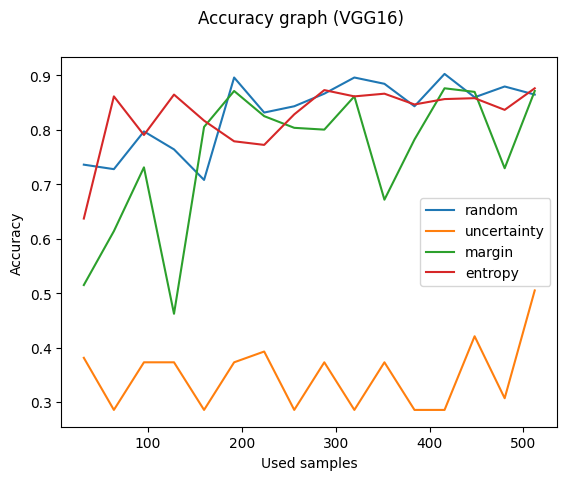

In [9]:
from matplotlib import pyplot as plt

plt.suptitle("Accuracy graph (VGG16)")
plt.xlabel("Used samples")
plt.ylabel("Accuracy")

for (name, _) in qss:
    print(f"reading data from query strategy '{name}'...")
    values = []
    with open(f"results/dataset/{name}/checkpoints.txt", "r") as file:
        for line in file:
            line = line.split('|')
            values.append(float(line[-2]))
    plt.plot(steps, values, label=name)
plt.legend()
plt.show()

reading data from query strategy 'random'...
reading data from query strategy 'uncertainty'...
reading data from query strategy 'margin'...
reading data from query strategy 'entropy'...


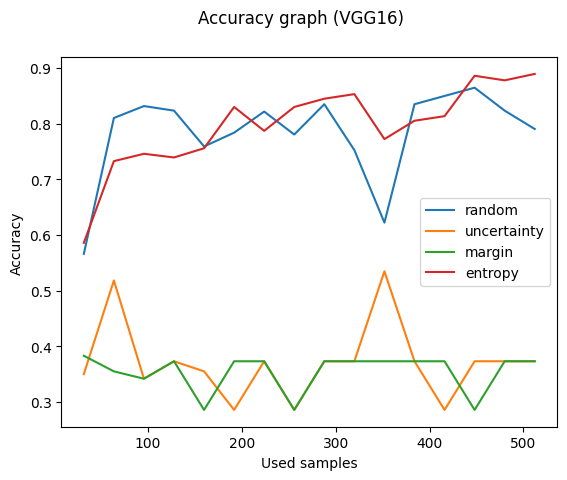

In [10]:
from matplotlib import pyplot as plt

plt.suptitle("Accuracy graph (VGG16)")
plt.xlabel("Used samples")
plt.ylabel("Accuracy")

for (name, _) in qss:
    print(f"reading data from query strategy '{name}'...")
    values = []
    with open(f"results/enhanced/{name}/checkpoints.txt", "r") as file:
        for line in file:
            line = line.split('|')
            values.append(float(line[-2]))
    plt.plot(steps, values, label=name)
plt.legend()
plt.show()